# Chapter 4 Exercises
## Set Up

In [46]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [47]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Exercise 13
This question should be answered using the Weekly data set, which
 is part of the ISLP package. This data is similar in nature to the
 Smarket data from this chapter’s lab, except that it contains 1,089
 weekly returns for 21 years, from the beginning of 1990 to the end of
 2010.

In [48]:
Weekly = load_data('Weekly')
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


### Part a)
Produce some numerical and graphical summaries of the Weekly
 data. Do there appear to be any patterns?


In [49]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [50]:
Weekly.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


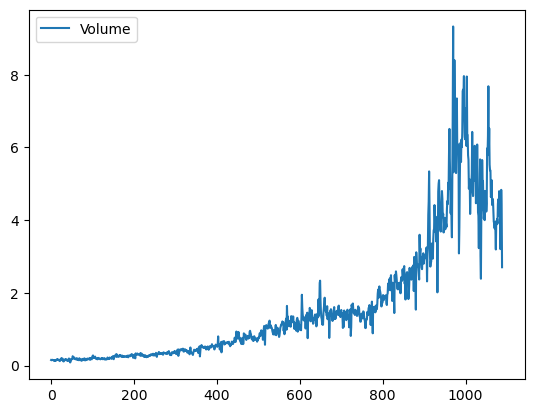

In [51]:
Weekly.plot(y='Volume');

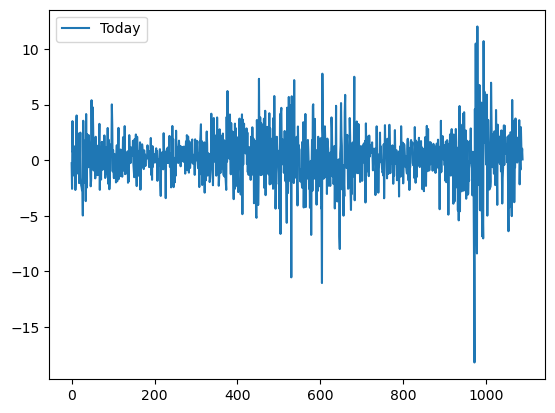

In [52]:
Weekly.plot(y='Today');

Looks like volume has tended to increase over time, but has been decreasing recently, this seems to coincide with higher volatility in 'Today' - (the percentage return on the date in question).

### Part b)
 Use the full data set to perform a logistic regression with
 Direction as the response and the five lag variables plus Volume
 as predictors. Use the summary function to print the results. Do
 any of the predictors appear to be statistically significant? If so,
 which ones?

In [53]:
# pick correct columns/variables
allvars = Weekly.columns.drop(['Today', 'Direction', 'Year'])
#create design
design = MS(allvars)
#fit and transform design to data
X = design.fit_transform(Weekly)
#make dummy boolean variable for direction
y = Weekly.Direction == 'Up'
#select logistic generalized linear model
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
#fit model
results = glm.fit()
#print results
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


Lag2 appears to be statistically significant with p=0.03. Next smallest p-value is .118 associated with Lag1.

### Part c)
Compute the confusion matrix and overall fraction of correct
 predictions. Explain what the confusion matrix is telling you
 about the types of mistakes made by logistic regression.

In [54]:
probs = results.predict()
labels = np.array(['Down']*1089)
labels[probs>0.5] = "Up"

In [55]:
ct = confusion_table(labels, Weekly.Direction)
ct

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [56]:
def get_stats_ct(ct):
    total = ct.iloc[0,0]+ct.iloc[0,1]+ct.iloc[1,0]+ct.iloc[1,1]
    accuracy = (ct.iloc[0,0]+ct.iloc[1,1])/total
    fpr = (ct.iloc[1,0])/(ct.iloc[0,0]+ct.iloc[1,0])
    fnr = (ct.iloc[0,1])/(ct.iloc[0,1]+ct.iloc[1,1])
    return(accuracy, fpr, fnr)
accuracy, fpr, fnr = get_stats_ct(ct)
accuracy, fpr, fnr

(0.5610651974288338, 0.8884297520661157, 0.07933884297520662)

About 56% accuracte, 89% false positive rate, 8% false negative rate.

### Part d)
Now fit the logistic regression model using a training data period
 from 1990 to 2008, with Lag2 as the only predictor. Compute the
 confusion matrix and the overall fraction of correct predictions
 for the held out data (that is, the data from 2009 and 2010).

In [57]:
train = (Weekly.Year <= 2008)
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
Weekly_train.shape, Weekly_test.shape

((985, 9), (104, 9))

In [58]:
D = Weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [59]:
model = MS([ 'Lag2']).fit(Weekly)
X = model.transform(Weekly)
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*104)
labels[probs>0.5] = "Up"
ct = confusion_table(labels, L_test)
ct

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [60]:
accuracy, fpr, fnr = get_stats_ct(ct)
accuracy, fpr, fnr

(0.625, 0.7906976744186046, 0.08196721311475409)

About 63% accuracte, 79% false positive rate, 8% false negative rate.

### Part e)
Repeat (d) using LDA.